## Proyección de Datos - Aeropuerto de Leipzig (DE)

### **Reporte No. 2** - Propuesta de Proyecto

<p><strong>Asesor Principal</strong>: Prof. Álvaro Mauricio Montenegro Díaz, PhD <a>ammontenegrod@unal.edu.co</a> <br>
<strong>Asesor Suplente</strong>: Prof. Campo Elías Pardo Turriago, <a>cepardot@unal.edu.co</a> <br>
<strong>Autor</strong>: Alejandro Rios Serrano, <a>oarioss@unal.edu.co</a> </p>

#### Introduccion

la recoleccion y analisis de datos en la infraestructura permite una mejor planeación al proyectar futuras ampliaciones y mejoras en la construccion. La infraestructura instalada va copando su capacidad hasta que se hace necesaria una ampliación, nueva construccion o mejora de la capacidad. 

La proyección de uso en la infraestructura permite planear las ampliaciones y mejoras futuras con suficienta antelación para planear correctamente, conseguir permisos, desarrollar y ejecutar el proyecto.

<img src="https://miro.medium.com/max/1400/1*0o44SgYfO_NgbEbqRICftw.png" width="700" height="700">

   #### Descripción del Problema

El aeropuerto de Leipzig ha venido creciendo constantemente desde 1991, posicionandose como el segundo mayor aeropuerto de carga de Alemania detrás de Frankfurt [**Source**: Qualitätsbericht - Luftverkehrsteuer 04/2022](https://www-genesis.destatis.de/genesis/online?operation=abruftabelleBearbeiten&levelindex=1&levelid=1667651441718&auswahloperation=abruftabelleAuspraegungAuswaehlen&auswahlverzeichnis=ordnungsstruktur&auswahlziel=werteabruf&code=46421-0005&auswahltext=&werteabruf=starten&wertauswahl=1695&wertauswahl=1696&wertauswahl=1697&wertauswahl=1698#abreadcrumb).

Durante la pandemia, cayó drásticamente el transporte de carga y especialmente pasajeros. Con análisis de datos se pretende proyectar la recuperación en el transporte de carga y pasajeros, así como las ampliaciones futuras de la capacidad instalada en el aeropuerto de Leipzig (Alemania).

 <img src="http://www.wirtschaftinsachsen.de/wp-content/uploads/2008/10/germanwings_rollbruecke-flughafen-leipzig-halle1.jpg" width="700" height="700">

   #### Procesamiento ETL

Se cuenta con los datos de carga y pasajeros mes a mes del aeropuerto de Leipzig entre 2001-2022 *(con fecha de corte a septiembre 2022)*. A partir de los datos se pretende proyectar la recuperación del trafico de carga y pasajeros luego de la pandemia y la fecha estimada de colmación de la capacidad instalada. Se introduce Frankfurt como aeropuerto de control en los datos.

| **Aeropuerto:** | Frankfurt (FRA) | Leipzig (LEJ) |
| :---- | :----------- | :------ |
| **Datos** | pasajeros, , vuelos, carga | pasajeros, vuelos, carga |
| **Frecuencia** | mensual | mensual |


**Cantidad de Datos:** 1566 Datos (meses entre 2001-2022)<br>
**Cantidad de Variables:** 3

Se realizó la extracción de datos mensual y se organizó en las tres variables de los dos aeropuertos: Leipzig (LEJ) y Frankfurt (FRA).
*se utiliza la abreviación de codigo IATA*

Los datos se guardaron en un formato .csv y se alojaron localmente (disco D). El cargue de archivos se puede ver a continuación:

In [226]:
import pandas as pd
filepath=r"D:\Documents\0. PERSONAL\2. Estudio\5. Data Science\Proyecto Diplomado\2022.csv"
df=pd.read_csv(filepath, sep=";",skip_blank_lines=True, header=0, index_col=False,na_filter=False)
df.head(10)

,Fecha,LEJ Pasajeros,LEJ Vuelos,LEJ Carga (en Ton),FRA Pasajeros,FRA Vuelos,FRA Carga (en Ton)
0,2001 - enero,100039,2514,1279,3485502,36134,125539
1,2001 - febrero,123024,2500,1282,3331837,33304,134400
2,2001 - marzo,139184,2828,1332,4113299,37997,155509
3,2001 - abril,168075,2853,1094,4161270,37103,133906
4,2001 - mayo,189075,2912,1046,4188493,38321,128859
5,2001 - junio,227886,3147,1060,4543610,38830,133396
6,2001 - julio,259677,3170,1067,4843476,40462,132670
7,2001 - agosto,231281,3152,983,4815067,39968,128057
8,2001 - septiembre,260053,3116,1060,4410978,38706,130765
9,2001 - octubre,218845,3038,1132,3929095,38637,145423


In [231]:
df.tail(10)

,Fecha,LEJ Pasajeros,LEJ Vuelos,LEJ Carga (en Ton),FRA Pasajeros,FRA Vuelos,FRA Carga (en Ton)
251,2021 - diciembre,39816,6295,193682,2711316,27476,148925
252,2022 - enero,31985,5526,128061,2203901,24201,171749
253,2022 - febrero,36692,5321,123232,2112961,21848,161795
254,2022 - marzo,63888,6075,133788,2929942,26318,177610
255,2022 - abril,117311,5879,125240,3965858,31740,166023
256,2022 - mayo,149122,6419,129787,4570200,35930,169325
257,2022 - junio,166403,6403,127045,4980579,35261,163917
258,2022 - julio,185080,6565,125849,5013381,33313,157418
259,2022 - agosto,201995,6567,118327,5184080,35252,151582
260,2022 - septiembre,197792,6637,124579,4879956,33529,157961


Las variables de pasajeros y vuelos vienen expresadas en unidad (número de vuelos, número de pasajeros) y las de carga en peso (toneladas).

Se cuenta entonces con 3 variables de dos aeropuertos y una totalidad de 1560 datos (arriba en dos tablas expresadas).

#### Descripción de los Datos

Se realiza la primera descripción estadistica de los datos:

In [223]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LEJ Pasajeros,261.0,1.639646e+05,7.114715e+04,502.0,114174.0,157708.0,226800.0,309288.0
LEJ Vuelos,261.0,4.379966e+03,1.287868e+03,1776.0,3152.0,4705.0,5281.0,6794.0
LEJ Carga (en Ton),261.0,5.700616e+04,4.491116e+04,375.0,2068.0,65040.0,92420.0,193682.0
FRA Pasajeros,261.0,4.391676e+06,1.236314e+06,187346.0,3852431.0,4489581.0,5059060.0,6909529.0
FRA Vuelos,261.0,3.712972e+04,7.179095e+03,6148.0,35379.0,38830.0,41554.0,46598.0
FRA Carga (en Ton),261.0,1.688552e+05,2.008074e+04,115409.0,155631.0,173228.0,182699.0,209811.0


Se crean seguidamente los plots en pandas junto con matplotlib empezando con la importación de las bibliotecas y la generación de los plots:

In [122]:
import matplotlib as mpl
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

El primer plano condensa la totalidad de las variables en un solo plot. Por la gran diferencia en los numeros (miles, cientos de miles y **millones**) el plot no es facilmente legible (sobretodo por el flujo de pasajeros en FRA).

Adicionalmente tengo el problema que no me lee las series de tiempo sino el número de datos:

<AxesSubplot:xlabel='Tiempo'>

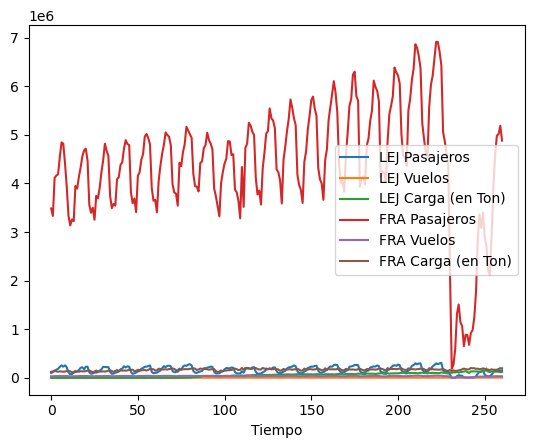

In [123]:
df.plot(xlabel="Tiempo")


En este segundo gráfico (más de ejercicio que de utilidad) compare el desarrollo del flujo de pasajeros y el número de vuelos entre 2001 y 2022 (corte a septiembre) agregando un plot secundario en el eje y.

<AxesSubplot:>

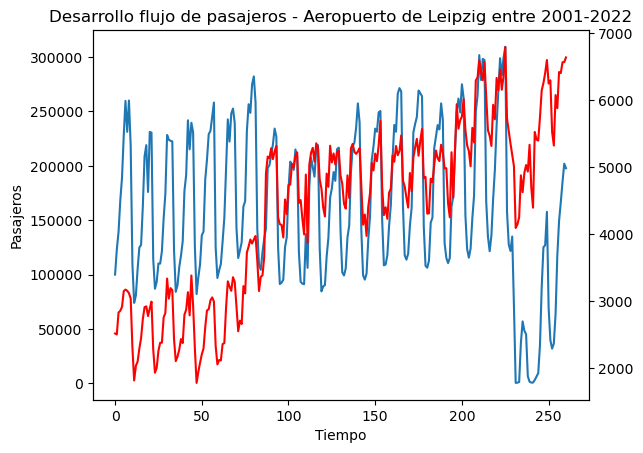

In [162]:
df["LEJ Pasajeros"].plot(kind="line",
                         grid=True,
                         title="Desarrollo flujo de pasajeros - Aeropuerto de Leipzig entre 2001-2022",
                         ylabel="Pasajeros",
                         xlabel="Tiempo")
df["LEJ Vuelos"].plot(secondary_y=True, style="r")

Se realiza la graficacion de las tres variables (pasajeros, vuelos y carga) para cara aeropuerto, empezando con LEJ:

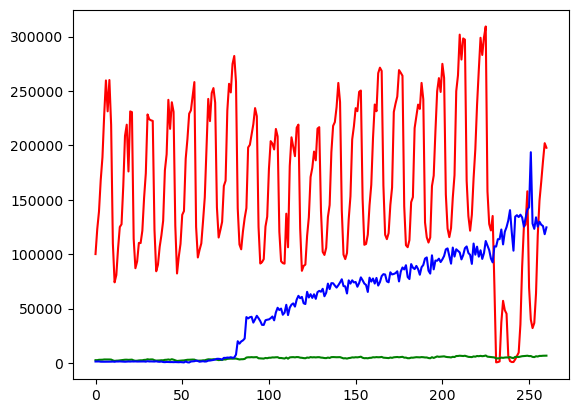

In [179]:
with pd.plotting.plot_params.use("x_compat",True):
    df["LEJ Pasajeros"].plot(color="r")
    df["LEJ Vuelos"].plot(color="g")
    df["LEJ Carga (en Ton)"].plot(color="b")

Y en este caso con FRA, notando el problema causado por la diferencia entre el gran flujo de pasajeros (rojo) y las otras variables:

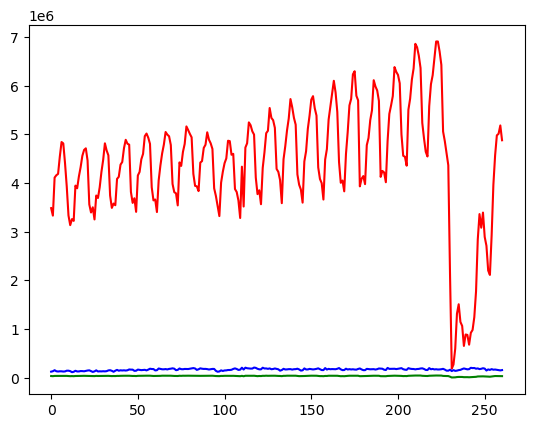

In [174]:
with pd.plotting.plot_params.use("x_compat",True):
    df["FRA Pasajeros"].plot(color="r")
    df["FRA Vuelos"].plot(color="g")
    df["FRA Carga (en Ton)"].plot(color="b")   

Finalmente se realizan subplots con las variables:

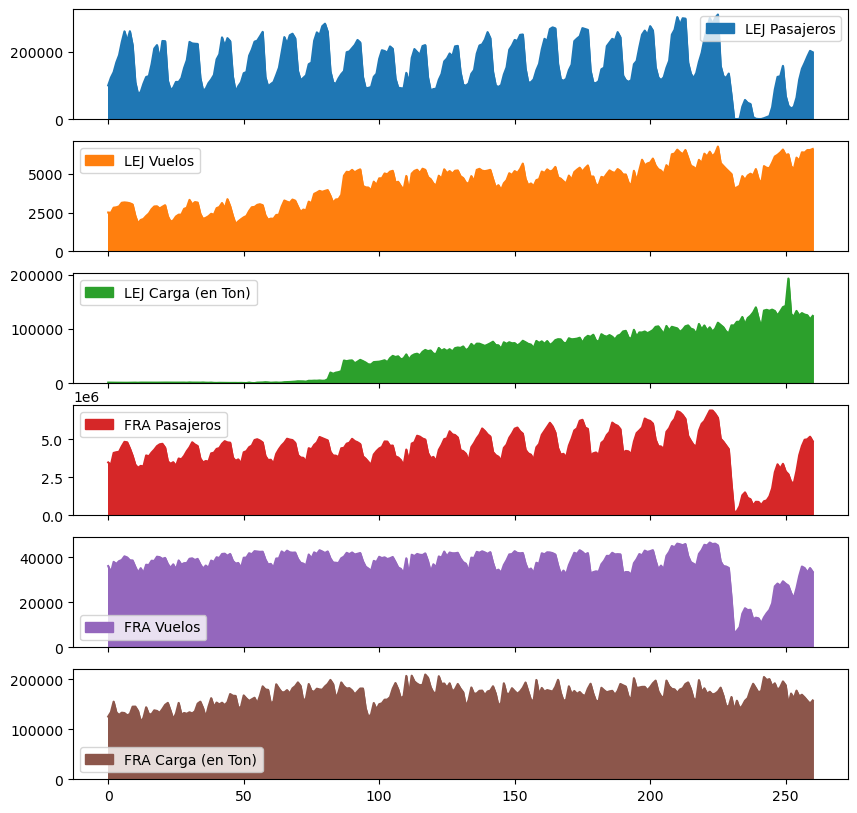

In [182]:
axs=df.plot.area(figsize=(10,10),subplots=True)

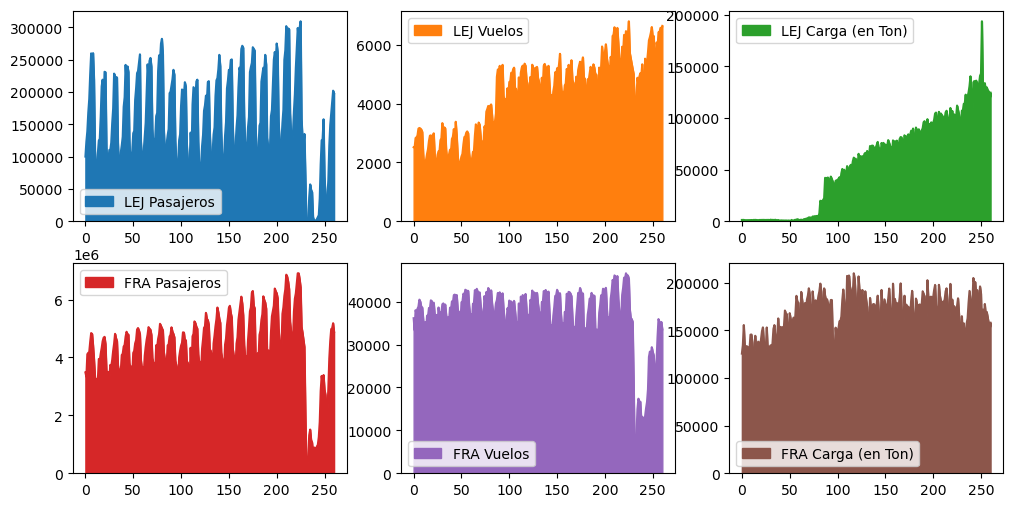

In [189]:
df.plot.area(subplots=True, layout=(2, 3), figsize=(12, 6), sharex=False);

Se extraeran los datos (pasajeros y carga) de los aeropuertos FRA y LEJ de las tablas (estas contienen la totalidad de los aeropuertos en Alemania). Se harán los analisis de los datos y se hará la proxección de crecimiento para los siguientes años hasta encontrar la fecha estimada de recuperación en el transporte y la fecha estimada de colmación de la capacidad.

# Datos viejos

   #### Exploración de los datos

La exploración de datos se realizara con estadisticas y graficas univariadas. Se tomara en cuenta la totalidad de los datos (792 datos - meses entre 2000-2022) y el desarrollo de carga, cantidad de vuelos y número de pasajeros (3 variables) en los aeropuertos de Leipzig (LEJ) y Frankfurt (FRA). 

   #### Técnicas de modelación propuestas*

Se propone hacer un modelado en redes neuronales. 

**se copian los codigos del Github del diplomado
punto en desarrollo*

[Graficos - Series Multivariadas](https://nbviewer.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/M%C3%B3dulo%205-%20Redes%20recurrentes/Cuadernos/rnrTimes_series_Multivariate.ipynb)

   #### Conocimientos requeridos para el desarrollo del proyecto

Se proponen los siguientes programas para el desarollo del proyecto:

- Python : nivel basico
- Modelos supervisados: predictivos


   #### Resultados esperados

Se espera que con el modelo de predicción se pueda proyectar una fecha estimada para la recuperacion del flujo de carga y de pasajeros a como estaba antes de la pandemia así como una fecha estimada para la ampliación de la capacitdad instalada del aeropuerto (crecimiento proyectado) con una fecha de corte aprox. 20 años antes* para la toma de decisión.

*el trasfondo de la fecha de corte para la decisión es que los proyectos en Alemania se demoran unos 15-20 años entre la toma de la decisión y la entrega del proyecto, con lo que se contempla esta ventana de tiempo como optimal para la toma de decisión.

   #### Tiempo de desarrollo esperado

cuatro semanas
- **fecha estimada inicio:** 05 Noviembre 2022
- **fecha estimada finalización:** 10 diciembre 2022

##### Fuentes

- [Desarrollo LEJ (hasta 2014)](https://web.archive.org/web/20150119194227/http://www.leipzig-halle-airport.de/unternehmen/ueber-uns/zahlen-und-fakten/entwicklung-158.html)
- [Capacidad Instalada LEJ](https://www.leipzig.de/wirtschaft-und-wissenschaft/investieren-in-leipzig/infrastruktur/verkehrsinfrastruktur/flughafen-leipzighalle/)
- [Datos](https://www.adv.aero/service/downloadbibliothek/)
- [Reportes](https://branchenreport.bdl.aero/)